# Exercise (a)
Can you segment the leaf from the image "leaf.jpg"?

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
from utils import display_image, display_images

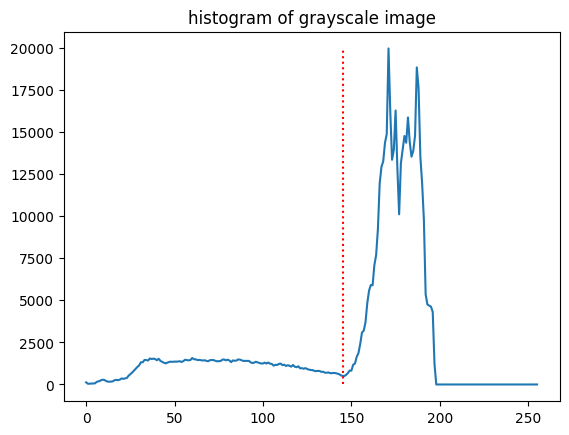

In [3]:
# By inspection of the image histogram
gray = cv.imread("images/leaf.jpg", 0)

# histogram
hist = cv.calcHist([gray], [0], None, [256], [0, 256])

plt.plot(hist)
plt.vlines(145, 0, hist.max(), color="red", linestyles="dotted")
plt.title("histogram of grayscale image")
plt.show()

In [4]:
th = cv.threshold(gray, 145, 255, cv.THRESH_BINARY_INV)[1]

display_images([gray, th], ("original", "threshold"))

# Exercise (b)
Apply average kernel with increasing size on an image. Use "dog.jfif" for this exercise. What can you infer from the resulting images?

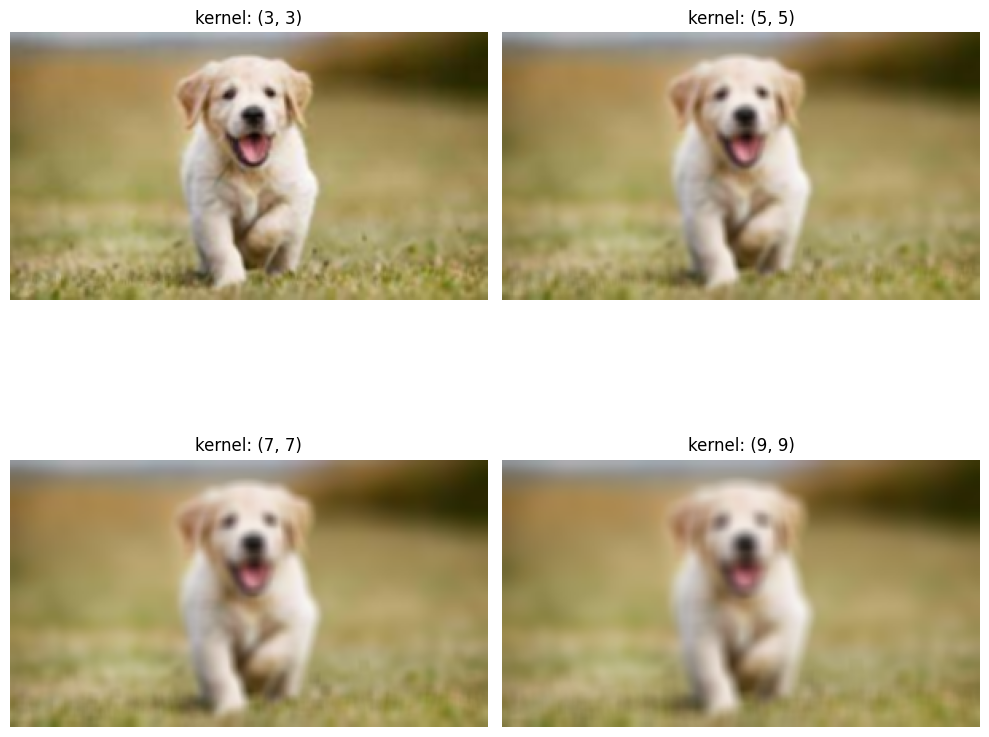

In [6]:
# There are multiple ways to do this: cv.blur(), cv.boxFilter(), and cv.filter2D()
ksizes = [3, 5, 7, 9]

img = cv.imread("images/dog.jfif")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()
for i, ksize in enumerate(ksizes):
    res = cv.blur(img_rgb, (ksize, ksize))
    ax[i].imshow(res)
    ax[i].set_title(f"kernel: {(ksize, ksize)}")
    ax[i].axis("off")

plt.tight_layout()

The image becomes blurrer as the kernel size increases.

# Exercise (c)
1. Use convolution `cv.filter2D()` to implement Laplacian filter on 'lena.jfif'.
2. What happen if you add the results of Laplacian of Gaussian (LOG) filters into the original image.

In [8]:
import numpy as np

In [9]:
# Laplacian filter
kernel_neg_center = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

gray = cv.imread("images/lena.jfif", 0)
res = cv.filter2D(gray, -1, kernel_neg_center)
display_images([gray, res], ("original", "Laplacian edge map"))

# Exercise (d)
Create a trackbar that control the hysterisis threshold in Canny edge detection and display the resulting images from the changes in the thresholds.

In [10]:
gray = cv.imread("images/camera.jpg", 0)

# callback function for the trackbar
def nothing(x):
    pass

window_name = "Canny edge"
cv.namedWindow(window_name)
cv.createTrackbar("threshold 1", window_name, 50, 300, nothing)
cv.createTrackbar("threshold 2", window_name, 100, 300, nothing)

while True:
    th1 = cv.getTrackbarPos("threshold 1", window_name)
    th2 = cv.getTrackbarPos("threshold 2", window_name)
    edge = cv.Canny(gray, th1, th2)
    cv.imshow(window_name, edge)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break

cv.destroyAllWindows()

# Exercise (e)
Can you think of a way to filter out just the monitor contour by using `cv.RETR_LIST` or `cv.RETR_TREE`?

In [14]:
img = cv.imread("images/monitor.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# thresholding
th = cv.threshold(gray, 200, 255, cv.THRESH_BINARY_INV)[1]

# find contour
contours, _ = cv.findContours(th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# find the largest contour
contour_max = max(contours, key=cv.contourArea)
img_copy = img.copy()
cv.drawContours(img_copy, [contour_max], 0, (0, 255, 0), 1, cv.LINE_AA)

display_image("contour monitor", img_copy)

# Exercise (f)
Draw
* Bounding box
* Rotated bounding box
* Minimum enclosing circle

on the bird in image "bird.jpg".

In [15]:
img = cv.imread("images/bird.jpg")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# histogram equalization and Canny edge detection
eq = cv.equalizeHist(gray)
edge = cv.Canny(eq, 100, 300)

# find contour and identify the largest contour
contours, _ = cv.findContours(edge, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contour_max = sorted(contours, key=cv.contourArea, reverse=True)[0]

# draw the contour
img_copy = img.copy()
cv.drawContours(img_copy, [contour_max], 0, (0, 255, 0))
display_image("contour", img_copy)

In [16]:
# bounding box
x, y, w, h = cv.boundingRect(contour_max)
cv.rectangle(img_copy, (x, y), (x+w, y+h), (255, 0, 0))
display_image("bounding box", img_copy)

In [17]:
# rotated bounding box
rect = cv.minAreaRect(contour_max)
box = cv.boxPoints(rect)
box = np.int_(box)
cv.drawContours(img_copy, [box], 0, (0, 0, 255))
display_image("rotated bb", img_copy)

In [18]:
# minimum enclosing circle
(x, y), radius = cv.minEnclosingCircle(contour_max)
center = (int(x), int(y))
radius = int(radius)
cv.circle(img_copy, center, radius, (50, 150, 50))
display_image("enclosing circle", img_copy)

# Weekly activities
1. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':  
$ 3 \times 3$ kernel:  
$ \begin{bmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0\\
\end{bmatrix}$  
$ 5 \times 5$ kernel:  
$ \begin{bmatrix}
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & 25 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
-1 & -1 & -1 & -1 & -1 \\
\end{bmatrix}$  
What can you infer from the outputs?
2. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.
3. Write a program to *segment the boat and the people on it from the background*. Follow the instruction below:
    - Use 'boat.jpg' as input.
    - Apply Otsu thresholding.
    - Draw bounding box to identify the region where the boat and people are located.

# Setup

In [2]:
import cv2 as cv
import numpy as np

# Question 1

In [3]:
# Question 1
kernel_small = np.array([[0, -1, 0],
                        [-1, 5, -1],
                        [0, -1, 0]])
# Custom 5x5 kernel
kernel_big = -np.ones((5, 5))
kernel_big[2, 2] = 25

img = cv.imread('images/native-bee.png')
sharp3_img = cv.filter2D(img, -1, kernel_small)
sharp5_img = cv.filter2D(img, -1, kernel_big)

cv.imshow('original', img)
cv.imshow('small kernel', sharp3_img)
cv.imshow('big kernel', sharp5_img)

cv.waitKey(0)
cv.destroyAllWindows()

The larger the kernel size, the more significant the effect of sharpening.

# Question 2

In [5]:
img = cv.imread('images/noise_lena.jpg')

k = 5

average_blur = cv.blur(img, (k, k))
median_blur = cv.medianBlur(img, k)
gaussian_blur = cv.GaussianBlur(img, (k, k), 0)

cv.imshow('average', average_blur)
cv.imshow('median', median_blur)
cv.imshow('gaussian', gaussian_blur)
cv.waitKey(0)
cv.destroyAllWindows()

**Inference:** The type of noise present is salt and pepper noise.

# Question 3

## BGR to grayscale

In [6]:
img = cv.imread('images/boat.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

cv.imshow('gray', gray)
cv.waitKey(0)
cv.destroyAllWindows()

## Gaussian blur and thresholding

In [7]:
blur = cv.GaussianBlur(gray, (5, 5), 0)
ret, th = cv.threshold(blur, 0, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

cv.imshow('Otsu threshold', th)
cv.waitKey(0)
cv.destroyAllWindows()

## Draw bounding box

In [8]:
foreground_idx = cv.findNonZero(th)
foreground_idx_2D = foreground_idx.reshape(-1, 2)

coord_max = np.max(foreground_idx_2D, axis=0)
coord_min = np.min(foreground_idx_2D, axis=0)

cv.rectangle(img, (coord_min[0], coord_min[1]), 
            (coord_max[0], coord_max[1]), (255, 0, 0), 2,
            cv.LINE_AA)

cv.imshow('Otsu threshold', th)
cv.imshow('bounding box', img)
cv.waitKey(0)
cv.destroyAllWindows()